# intro

## about dataset

## get dataset

<p>you can get dataset from here <a href="https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset">here<a/>.</p>

# understand dataset

## import needed libs

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## import dataset

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

## get dataset size and features types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- dataset contains 12330 rows and total 28 features
- i know it says we've got '7 categorical features' but it is actully 8 features. feature 'Month' needs a preprocess.
- we also have 7 numerical features.
- and we need to predict 3 features.

In [4]:
df.head(n=3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


this time i'll not rename features

# analysing numerical features

In [5]:
df_num = df.select_dtypes(include="float64")
df.head(n=3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


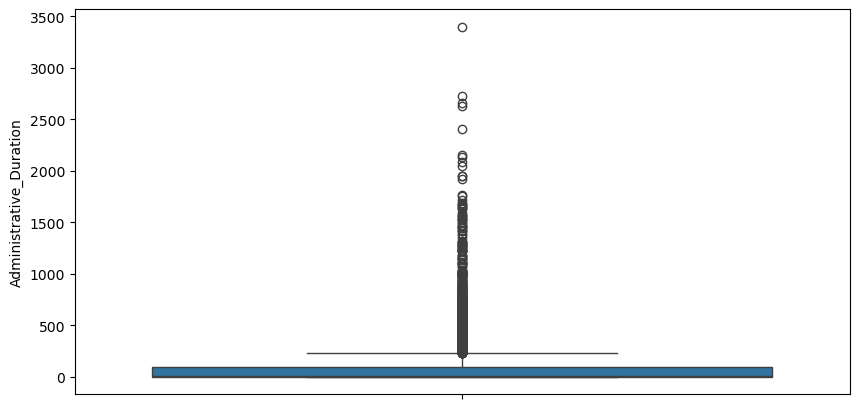

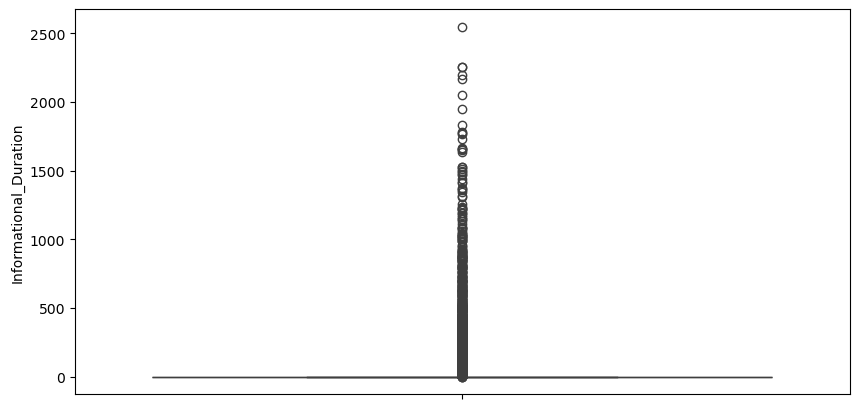

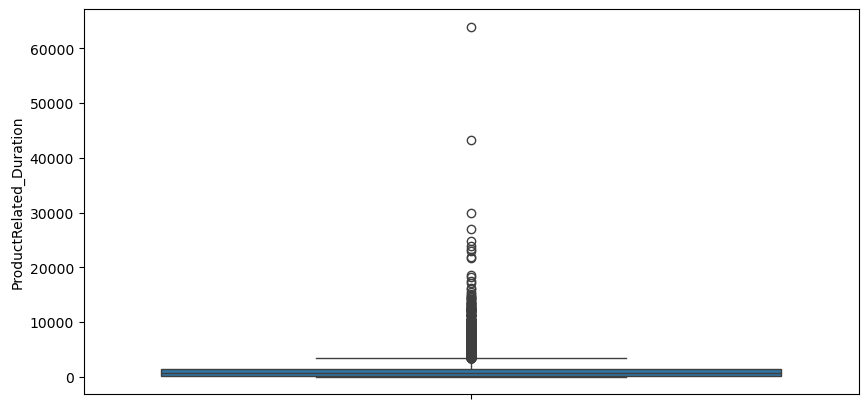

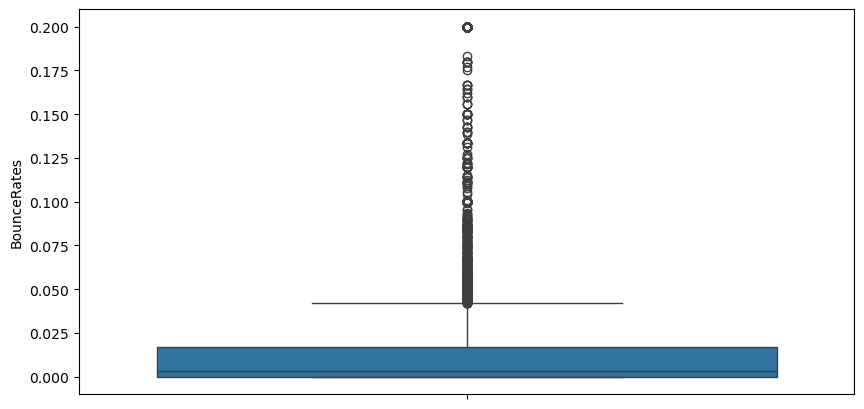

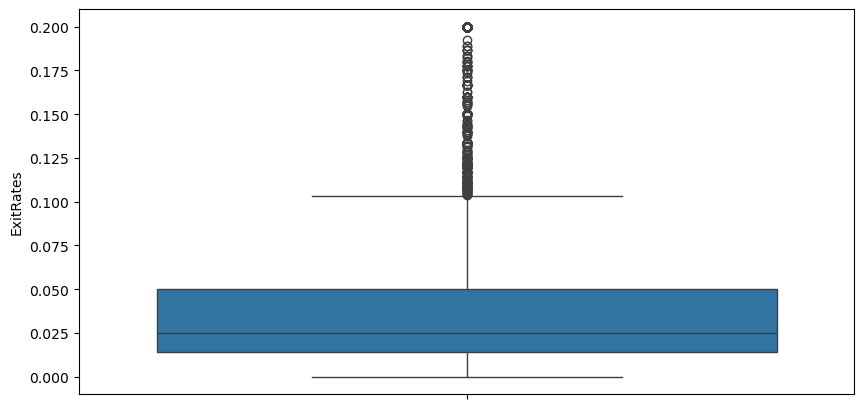

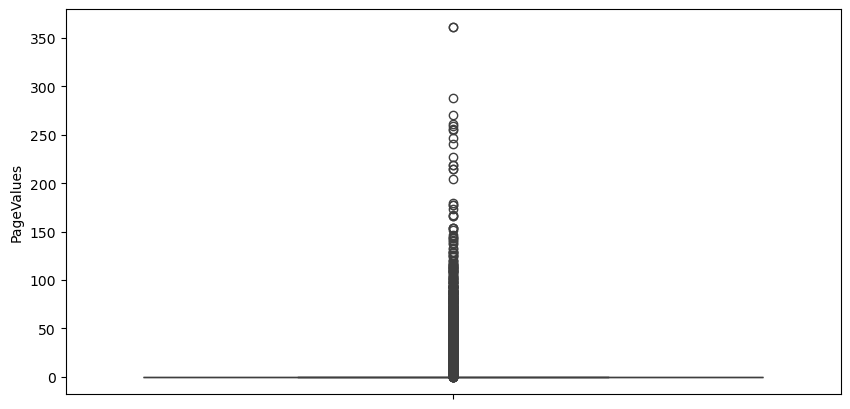

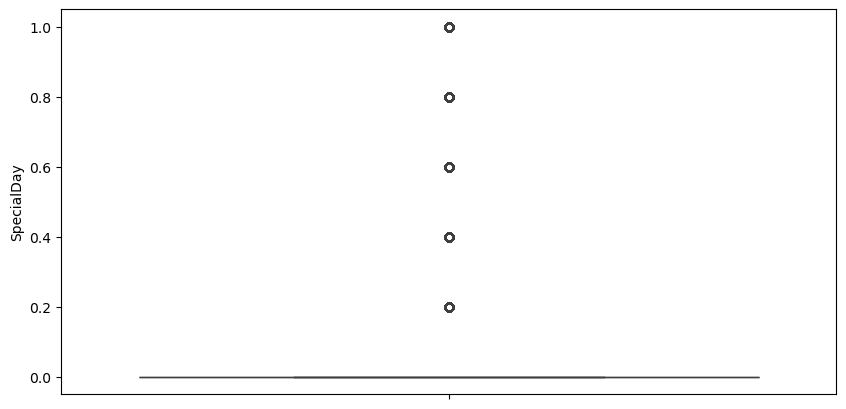

In [6]:
for n in df_num:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df_num[n])
    plt.show()

well yes there are outliers! we'll handel them soon ...

## analysing numerical features correlation (pearson)

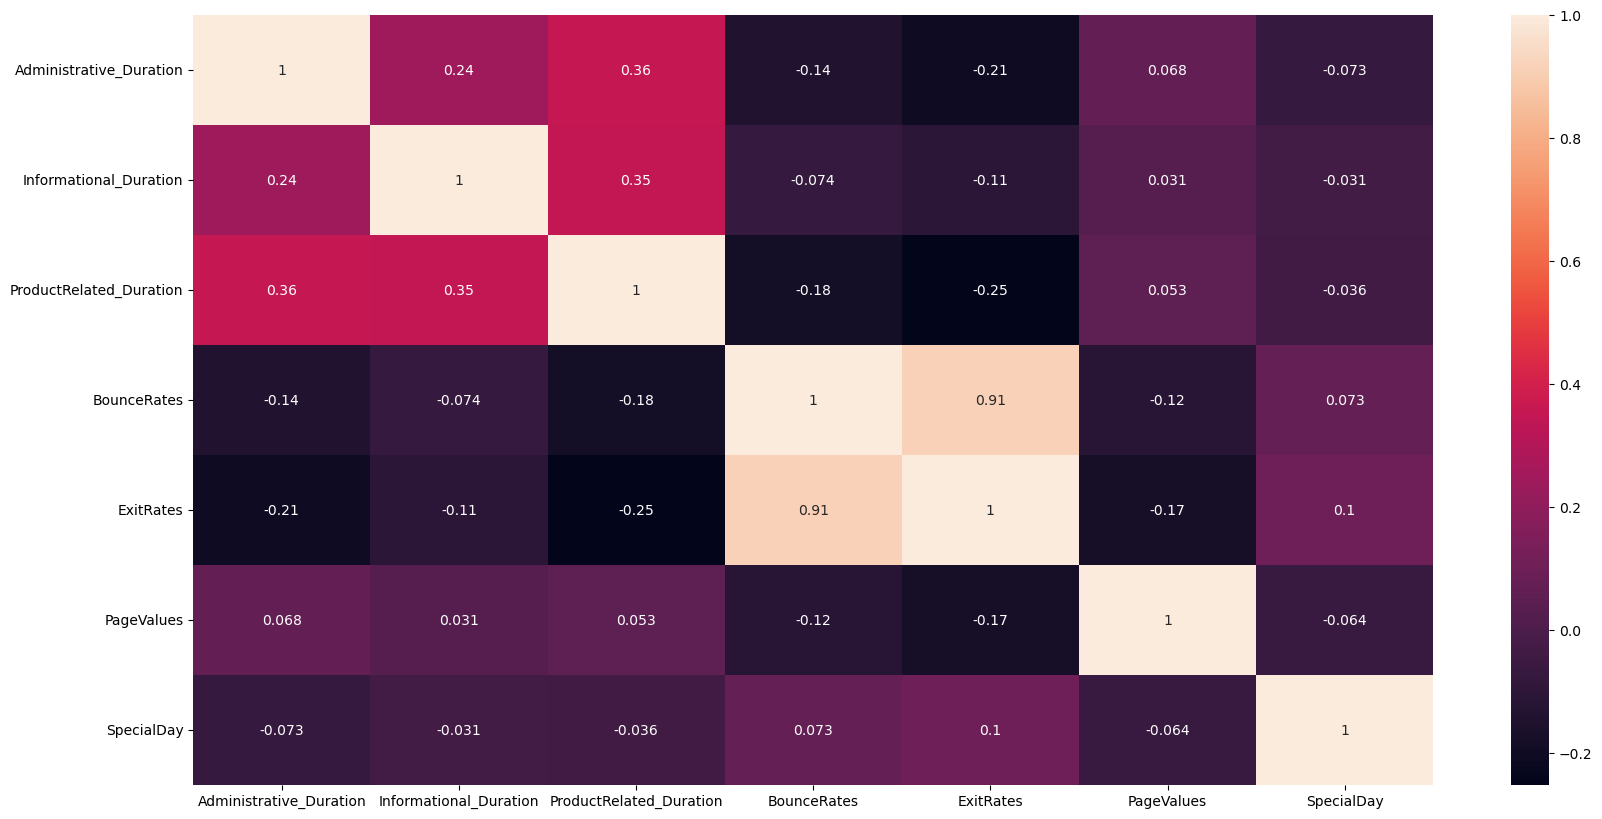

In [7]:
plt.figure(figsize=(20, 10))
corr_result = df_num.corr()
sns.heatmap(corr_result, annot=corr_result)
plt.show()

- ExitRates with BounceRates have strong correlation
- ExitRates wuth Administrative_Duration, ProductRelated_Duration, PageValues have weak correlation

## do some statistic analysis

<Axes: >

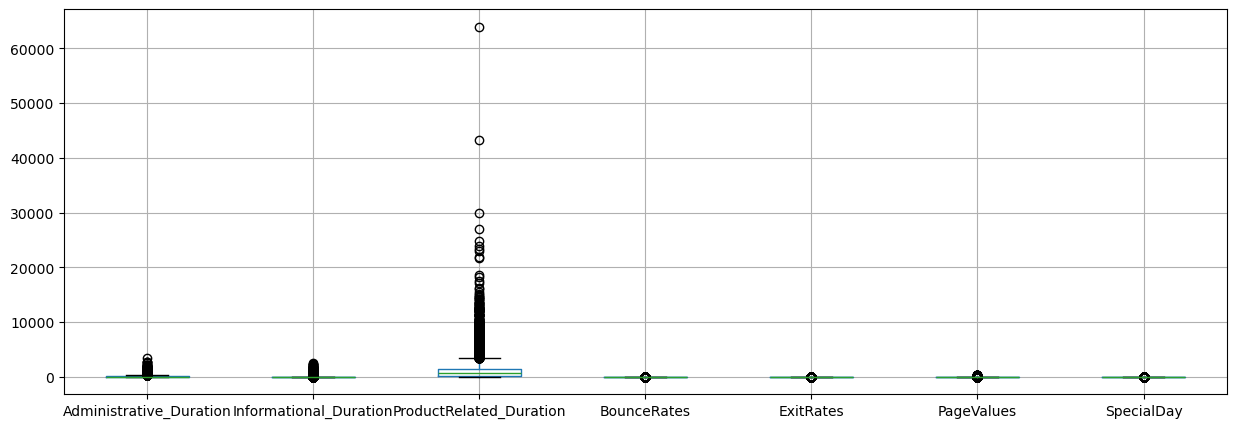

In [8]:
df_num.boxplot(figsize=(15, 5))

In [9]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


in some features, first quantities are 0! there are bad smells... 

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>],
       [<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>,
        <Axes: title={'center': 'PageValues'}>],
       [<Axes: title={'center': 'SpecialDay'}>, <Axes: >, <Axes: >]],
      dtype=object)

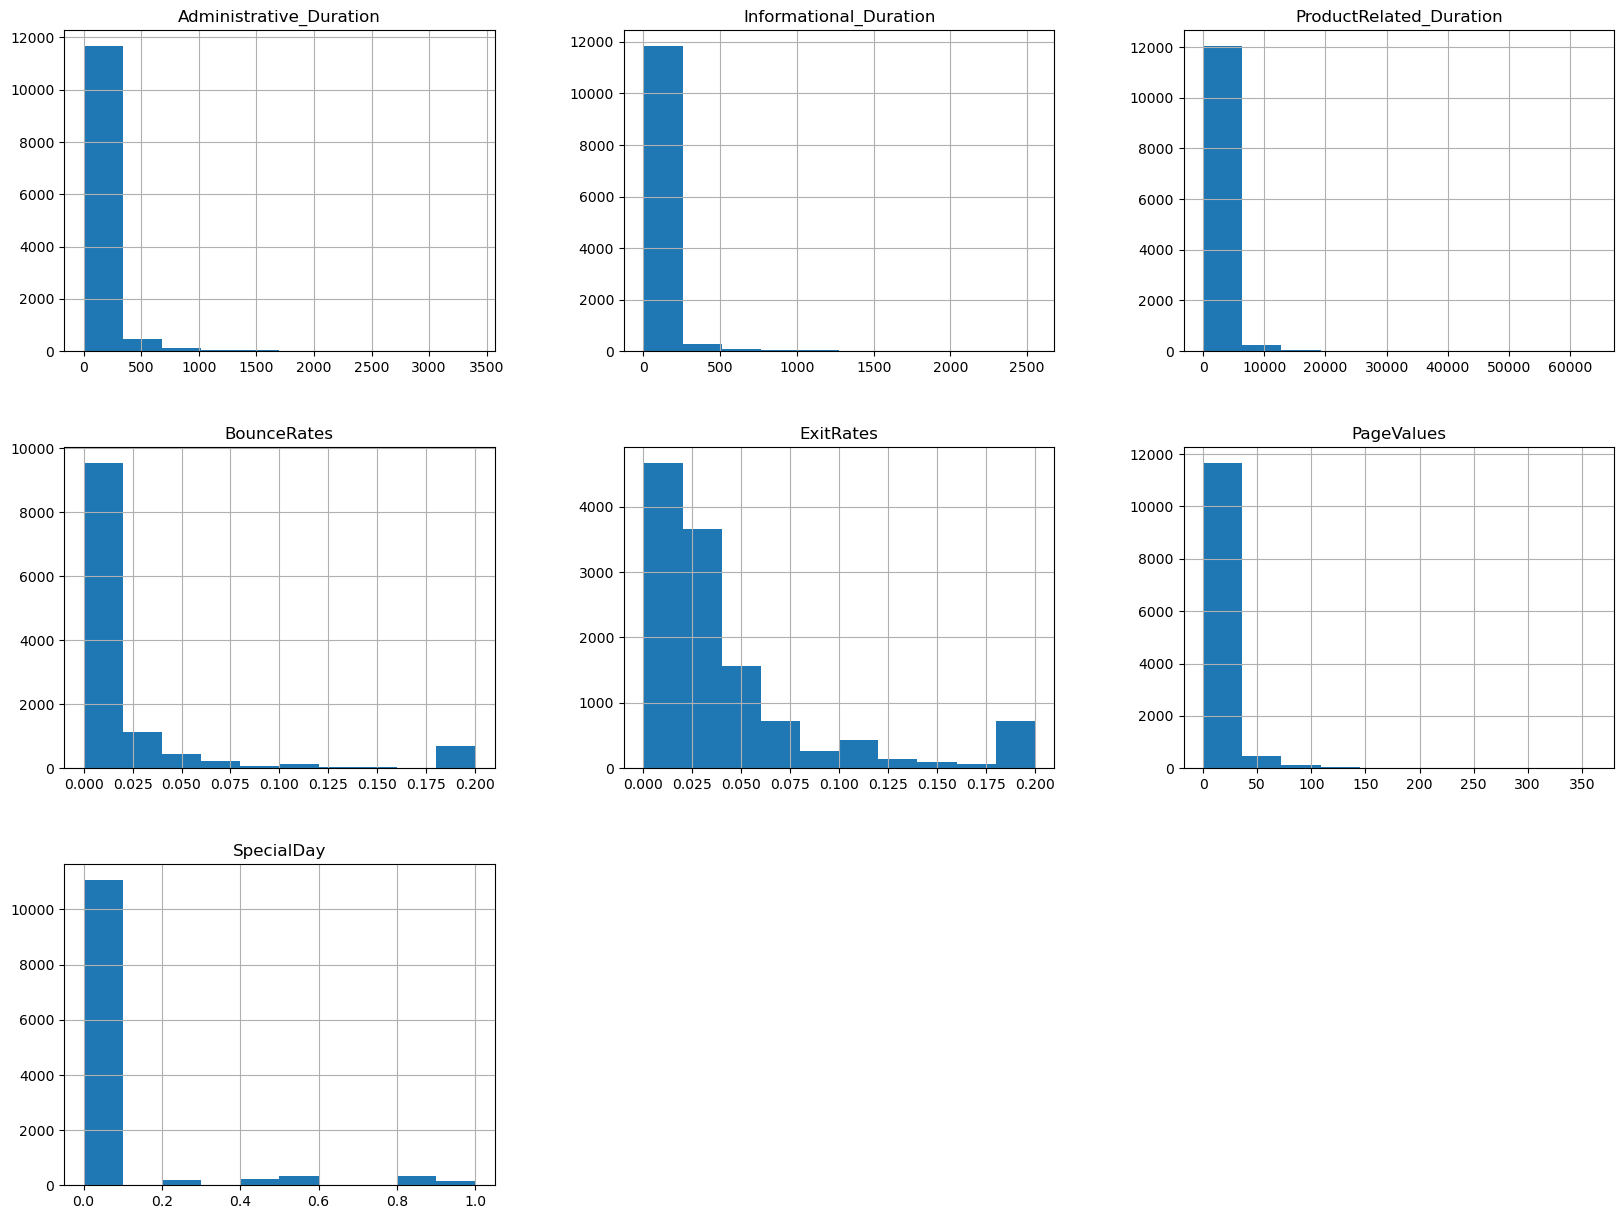

In [10]:
df_num.hist(figsize=(20, 15))

well well well, let's check the data balance

/tmp/ipykernel_4884/2147275414.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.hist(df['Weekend'].replace(to_replace=[True, False], value=[1, 0]))
/tmp/ipykernel_4884/2147275414.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.hist(df['Revenue'].replace(to_replace=[True, False], value=[1, 0]))


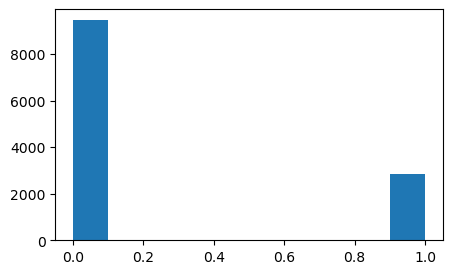

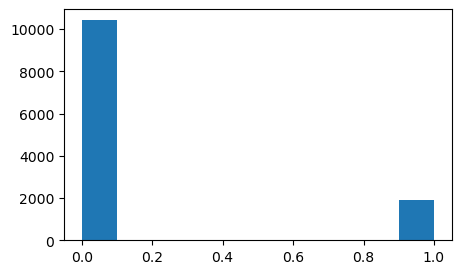

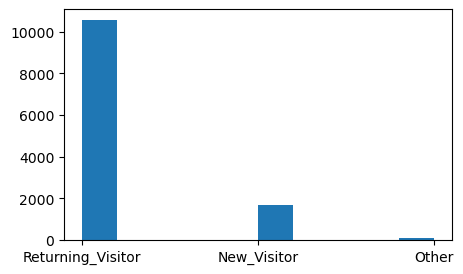

In [11]:
plt.figure(figsize=(5, 3))
plt.hist(df['Weekend'].replace(to_replace=[True, False], value=[1, 0]))
plt.figure(figsize=(5, 3))
plt.hist(df['Revenue'].replace(to_replace=[True, False], value=[1, 0]))
plt.figure(figsize=(5, 3))
plt.hist(df['VisitorType'])
plt.show()

ok now i see, it is not balanced.

# analysing categorical features

## label encode feature 'Month'

In [12]:
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3, 
    'Apr': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
df['Month'] = df['Month'].apply(lambda x: month_mapping.get(x, x))

df['Month'].head(n=3)


0    2
1    2
2    2
Name: Month, dtype: int64

## check dataset misseed datas (although i now we dont have)

In [13]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
df_cat = df.select_dtypes(include='int64')
df_cat.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Informational,12330.0,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
ProductRelated,12330.0,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
Month,12330.0,7.651987,3.392841,2.0,5.0,7.0,11.0,12.0
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.0,2.0,3.0,8.0
Browser,12330.0,2.357097,1.717277,1.0,2.0,2.0,2.0,13.0
Region,12330.0,3.147364,2.401591,1.0,1.0,3.0,4.0,9.0
TrafficType,12330.0,4.069586,4.025169,1.0,2.0,2.0,4.0,20.0


# preprocess data

## encode label VisitorType

In [15]:
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

## remove outlier datas

In [16]:
def remove_outlier(df: pd.DataFrame, col_name: str):
    limit = 2.5
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    df = df[df[col_name] >= q1 - limit * iqr]
    df = df[df[col_name] <= q3 + limit * iqr]
    return df

In [17]:
print(df.shape)
for n in df_num.columns:
    df = remove_outlier(df, col_name=n)
print(df.shape)

(12330, 18)
(5950, 18)


In [18]:
X = df.drop(columns=['VisitorType'])
y = df['VisitorType']

In [19]:
def resample_smote(df_target: pd.DataFrame, df: pd.DataFrame):
    smote = SMOTE()
    X_resample, y_resample = smote.fit_resample(df, df_target)
    # Fix: pd.concat needs a list of DataFrames/Series as its first argument
    return pd.concat([pd.DataFrame(X_resample, columns=df.columns), 
                     pd.Series(y_resample, name=df_target.name)], axis=1)

In [20]:
df = resample_smote(df['VisitorType'], df.drop(columns=['VisitorType']))
df = resample_smote(df['Revenue'], df.drop(columns=['Revenue']))
df = resample_smote(df['Weekend'], df.drop(columns=['Weekend']))

In [21]:
df['Revenue'] = df['Revenue'].replace(to_replace=[True, False], value=[1, 0])
df['Weekend'] = df['Weekend'].replace(to_replace=[True, False], value=[1, 0])

/tmp/ipykernel_4884/3220513577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Revenue'] = df['Revenue'].replace(to_replace=[True, False], value=[1, 0])
/tmp/ipykernel_4884/3220513577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weekend'] = df['Weekend'].replace(to_replace=[True, False], value=[1, 0])


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['VisitorType']), df['VisitorType'], test_size=0.3)

# model

In [27]:
dtc = DecisionTreeClassifier()
dtc_model_VisitorType = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4522
           1       0.96      0.97      0.97      3023
           2       0.83      0.79      0.81      1801

    accuracy                           0.92      9346
   macro avg       0.91      0.90      0.90      9346
weighted avg       0.92      0.92      0.92      9346



In [30]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77      4522
           1       0.99      0.64      0.78      3023
           2       0.62      0.15      0.24      1801

    accuracy                           0.71      9346
   macro avg       0.75      0.59      0.60      9346
weighted avg       0.75      0.71      0.67      9346

